# Visualización de clusters eligiendo 2 dimensiones

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df_data = (pd.read_csv("results/2020-09-27-dataset.labeled.csv"))

scaler = StandardScaler()
numeric = df_data[["dst_ip","proto","src_port","avg_duration"]]
numeric = pd.DataFrame(scaler.fit_transform(numeric))
numeric.columns = ["dst_ip","proto","src_port","avg_duration"]

X = pd.concat([numeric, df_data["cluster"]], axis=1, join='inner')
X

,dst_ip,proto,src_port,avg_duration,cluster
0,2.519189,-0.360061,0.138269,0.029030,many_cnxs
1,2.181267,3.510478,0.229870,0.039982,udp
2,0.981064,-0.360061,-0.075467,-0.007659,many_cnxs
3,1.598645,-0.360061,0.162754,0.209725,many_cnxs
4,1.330638,-0.360061,2.189792,-0.067639,many_cnxs
...,...,...,...,...,...
4010,-1.069768,-0.360061,-0.881155,-0.080935,few_cnxs
4011,-1.128030,-0.360061,-0.884324,-0.083029,long_duration
4012,-1.128030,-0.360061,-0.884900,-0.044068,long_duration
4013,-1.128030,-0.360061,-0.884900,-0.075512,long_duration


In [2]:
plotX = X #pd.DataFrame(np.array(X.sample(10000))) # 53k datos son demasiados para dibujar
plotX.columns = X.columns

4012 values of dst_ip inside [-5,5]
4015 values of proto inside [-5,5]
4013 values of src_port inside [-5,5]
4009 values of avg_duration inside [-5,5]


,dst_ip,proto,src_port,avg_duration,cluster
0,2.519189,-0.360061,0.138269,0.029030,many_cnxs
1,2.181267,3.510478,0.229870,0.039982,udp
2,0.981064,-0.360061,-0.075467,-0.007659,many_cnxs
3,1.598645,-0.360061,0.162754,0.209725,many_cnxs
4,1.330638,-0.360061,2.189792,-0.067639,many_cnxs
...,...,...,...,...,...
4010,-1.069768,-0.360061,-0.881155,-0.080935,few_cnxs
4011,-1.128030,-0.360061,-0.884324,-0.083029,long_duration
4012,-1.128030,-0.360061,-0.884900,-0.044068,long_duration
4013,-1.128030,-0.360061,-0.884900,-0.075512,long_duration


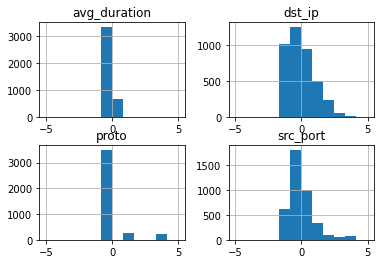

In [3]:
plotX.hist(bins=12, range=[-5,5])
for p in numeric: print(plotX[p].between(-5,5).sum(),"values of",p,"inside [-5,5]")
plotX

# Visualización 2D

In [4]:
import plotly.graph_objs as go

clusters_names = ["many_cnxs", "few_cnxs", "udp", "long_duration"] #, "anom"]
clusters_colors = ["#1098c8","#e0e828","#582870","#50b050","#c02058"]
clusters = [ plotX[plotX["cluster"] == c] for c in clusters_names ]

data = [
    go.Scatter(
        x = clusters[i]["dst_ip"],
        y = clusters[i]["src_port"],
        mode = "markers",
        name = f'Cluster "{c}"',
        marker = dict(color=clusters_colors[i])
    )
for i,c in enumerate(clusters_names)]

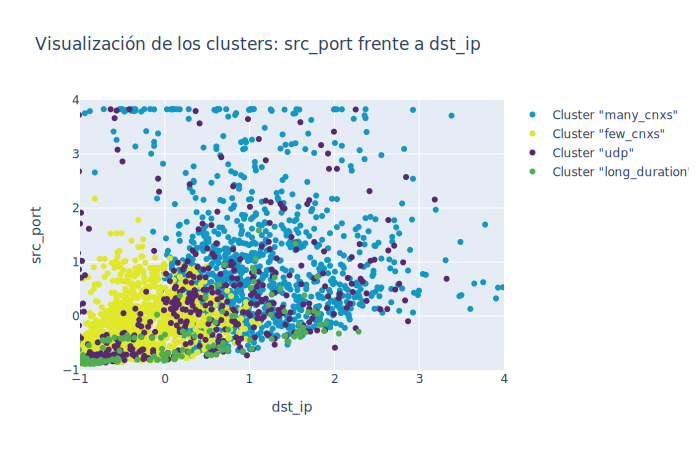

In [5]:
from plotly.offline import iplot

layout = dict(title = "Visualización de los clusters: src_port frente a dst_ip",
              xaxis = dict(title='dst_ip',ticklen=5,zeroline=False,range=[-1,4]),
              yaxis = dict(title='src_port',ticklen=5,zeroline=False,range=[-1,4])
        )

fig = dict(data=data, layout=layout)

#iplot(fig)
go.Figure(fig).show('svg')

# Visualización 3D

In [6]:
data = [
    go.Scatter3d(
        x = clusters[i]["dst_ip"],
        y = clusters[i]["src_port"],
        z = clusters[i]["avg_duration"],
        mode = "markers",
        name = f'Cluster "{c}"',
        marker = dict(color=clusters_colors[i], size=2)
    )
for i,c in enumerate(clusters_names)]

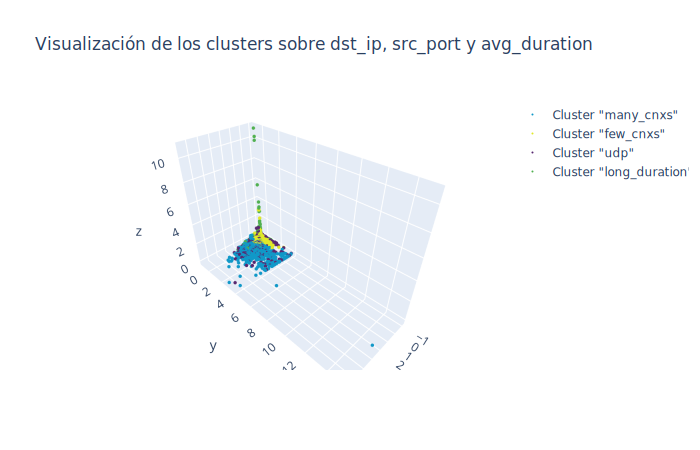

In [11]:
from plotly.offline import iplot

layout = dict(title = "Visualización de los clusters sobre dst_ip, src_port y avg_duration")

fig = dict(data=data, layout=layout)

#iplot(fig)
go.Figure(fig).show('svg')